In [18]:
from typing import Optional
import matplotlib.pyplot as plt
import math
import numpy as np


def display_arrays(rows: int = 1, cols: Optional[int] = None, **images_kwargs):
    """
    Displays multiple image arrays using Matplotlib in a grid layout.

    Args:
        rows: The number of rows in the subplot grid.
        cols: The number of columns in the subplot grid.
        **images_kwargs: Keyword arguments where each key is the title
                         and each value is a 2D numpy/jax array (image).
    """
    num_images = len(images_kwargs)
    if num_images == 0:
        print("No images provided to display.")
        return

    if cols is None:
        cols = math.ceil(num_images / rows)
    if rows * cols < num_images:
        print(
            f"Warning: Not enough subplots ({rows}x{cols}={rows * cols}) for {num_images} images. "
            f"Some images will not be displayed.")
        # Optionally, you could adjust rows/cols or raise an error

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))  # Adjust figsize as needed

    # If rows=1 and cols=1, axes is not an array but a single AxesSubplot object.
    # If rows=1 or cols=1, axes is a 1D array.
    # Otherwise, axes is a 2D array.
    # We flatten it for easier iteration.
    if isinstance(axes, plt.Axes):  # Single subplot
        axes_flat = [axes]
    else:
        axes_flat = axes.flatten()

    for i, (title, img_array) in enumerate(images_kwargs.items()):
        if i >= len(axes_flat):
            break  # Stop if we run out of subplots

        ax = axes_flat[i]
        # Convert JAX array to NumPy array if it's not already, for matplotlib
        # Matplotlib usually handles JAX arrays fine, but explicit conversion is safer.
        img_to_plot = np.asarray(img_array)

        im = ax.imshow(img_to_plot, cmap='cividis', vmin=0., vmax=1.)  # You can change the colormap
        ax.set_title(title)
        ax.axis('off')  # Hide axes ticks and labels

    # Hide any unused subplots
    for j in range(num_images, len(axes_flat)):
        axes_flat[j].axis('off')

    plt.tight_layout()
    plt.show()


In [20]:
from pathlib import Path
from PIL import Image
import jax.numpy as jnp
from IPython.display import display
import jax


def load_image_to_array(img_path: Path) -> jax.Array:
    img = Image.open(img_path)
    as_array = jnp.asarray(img)
    assert as_array.ndim == 2
    return as_array / 255.0


f1 = load_image_to_array(Path('./datasets/frames/workshop/frame_000500.png'))
f2 = load_image_to_array(Path('./datasets/frames/workshop/frame_000505.png'))

In [30]:
import jaxwt
from scipy.datasets import face
from jaxwt.packets import WaveletPacket2D
import pywt

wavelet = pywt.Wavelet("db4")
w = WaveletPacket2D(f1, wavelet)
print(w.data.keys())

dict_keys(['', 'a', 'aa', 'aaa', 'aah', 'aav', 'aad', 'ah', 'aha', 'ahh', 'ahv', 'ahd', 'av', 'ava', 'avh', 'avv', 'avd', 'ad', 'ada', 'adh', 'adv', 'add', 'h', 'ha', 'haa', 'hah', 'hav', 'had', 'hh', 'hha', 'hhh', 'hhv', 'hhd', 'hv', 'hva', 'hvh', 'hvv', 'hvd', 'hd', 'hda', 'hdh', 'hdv', 'hdd', 'v', 'va', 'vaa', 'vah', 'vav', 'vad', 'vh', 'vha', 'vhh', 'vhv', 'vhd', 'vv', 'vva', 'vvh', 'vvv', 'vvd', 'vd', 'vda', 'vdh', 'vdv', 'vdd', 'd', 'da', 'daa', 'dah', 'dav', 'dad', 'dh', 'dha', 'dhh', 'dhv', 'dhd', 'dv', 'dva', 'dvh', 'dvv', 'dvd', 'dd', 'dda', 'ddh', 'ddv', 'ddd'])


[(64, 64),
 (1, 35, 35),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 35, 35),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 35, 35),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 35, 35),
 (1, 21, 21),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 14, 14),
 (1, 21, 21),
 (1, 14, 

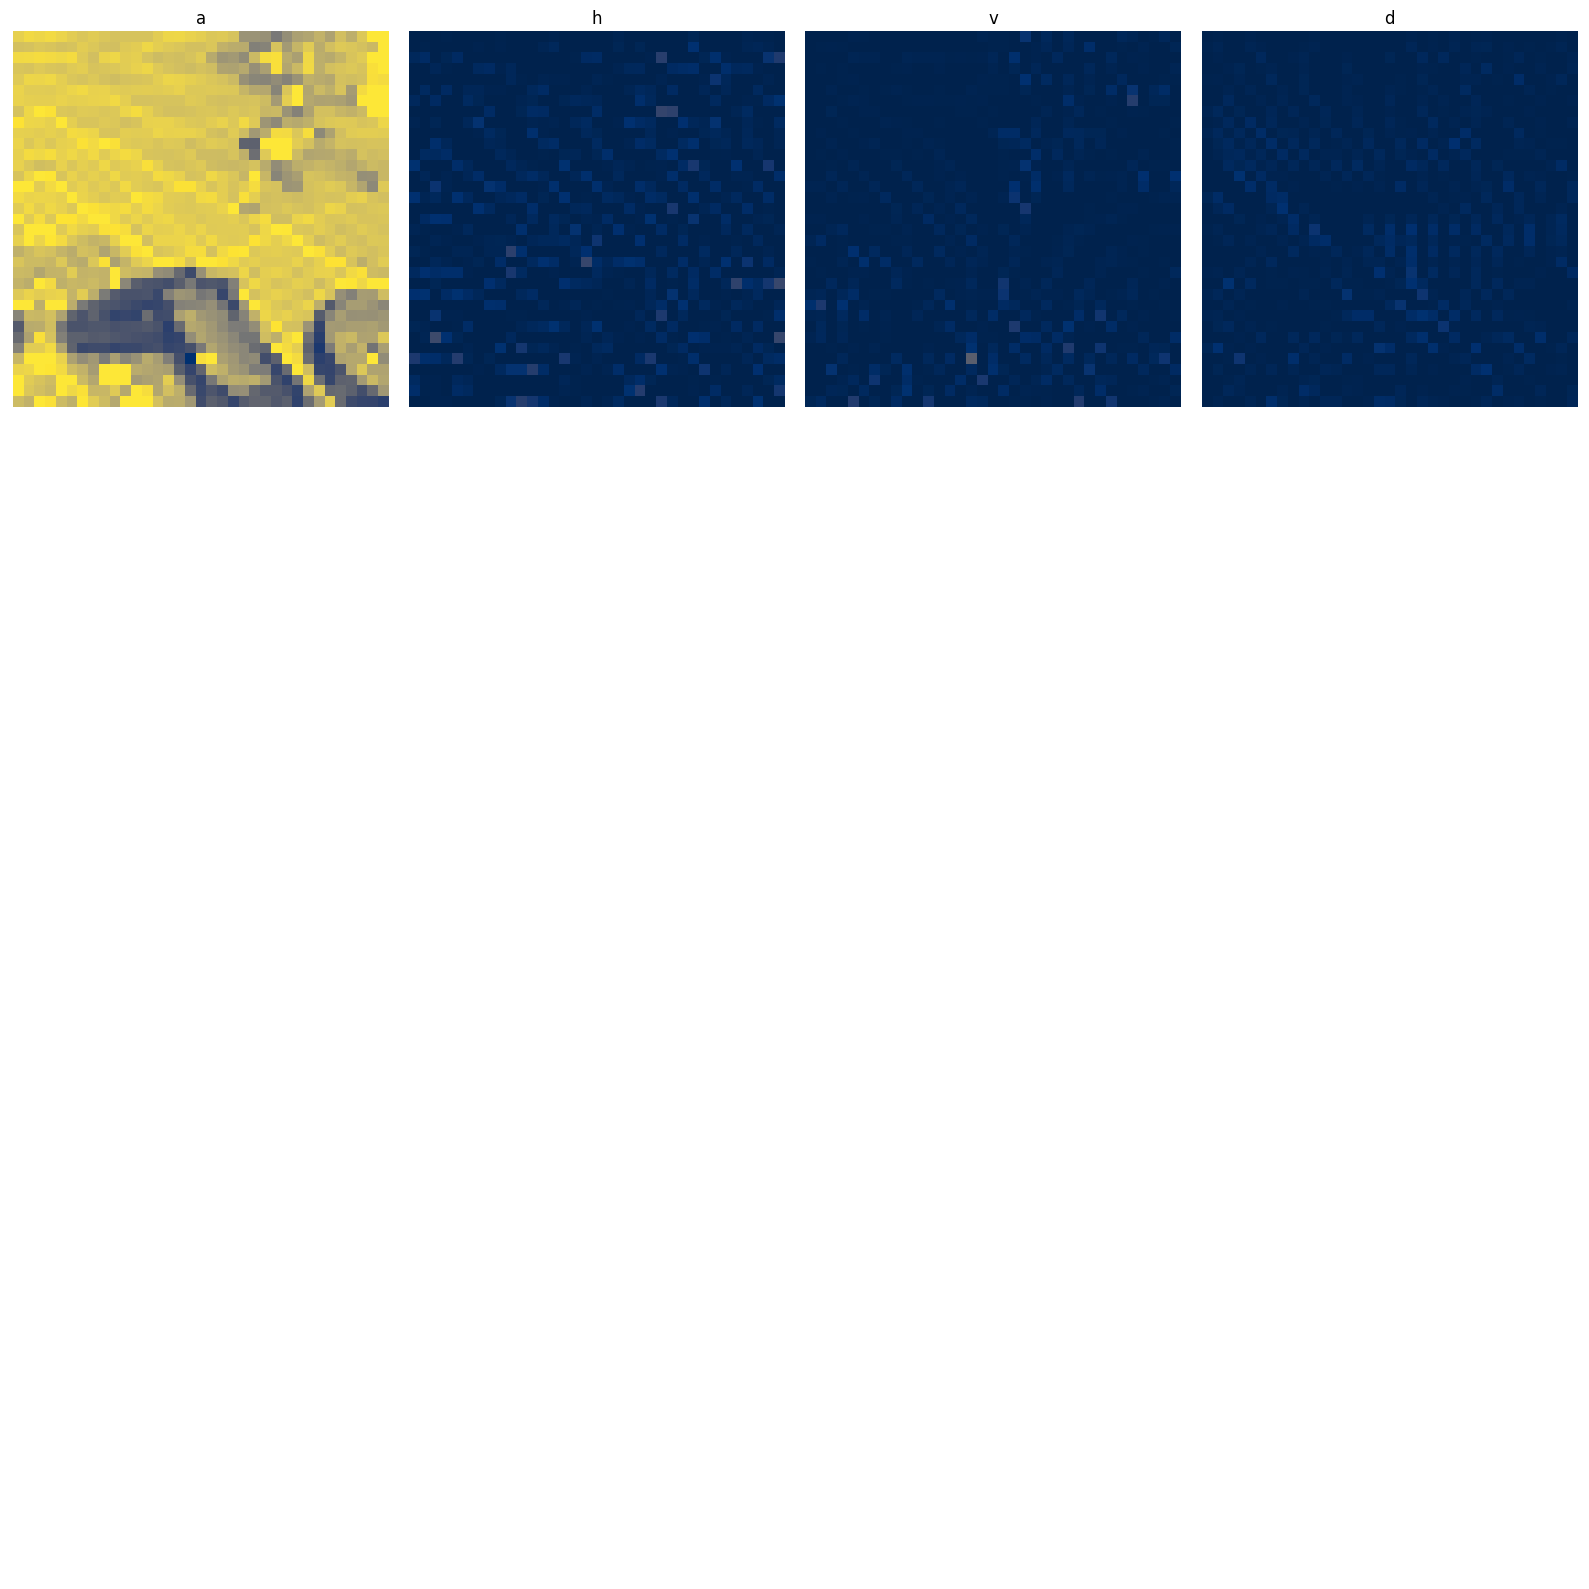

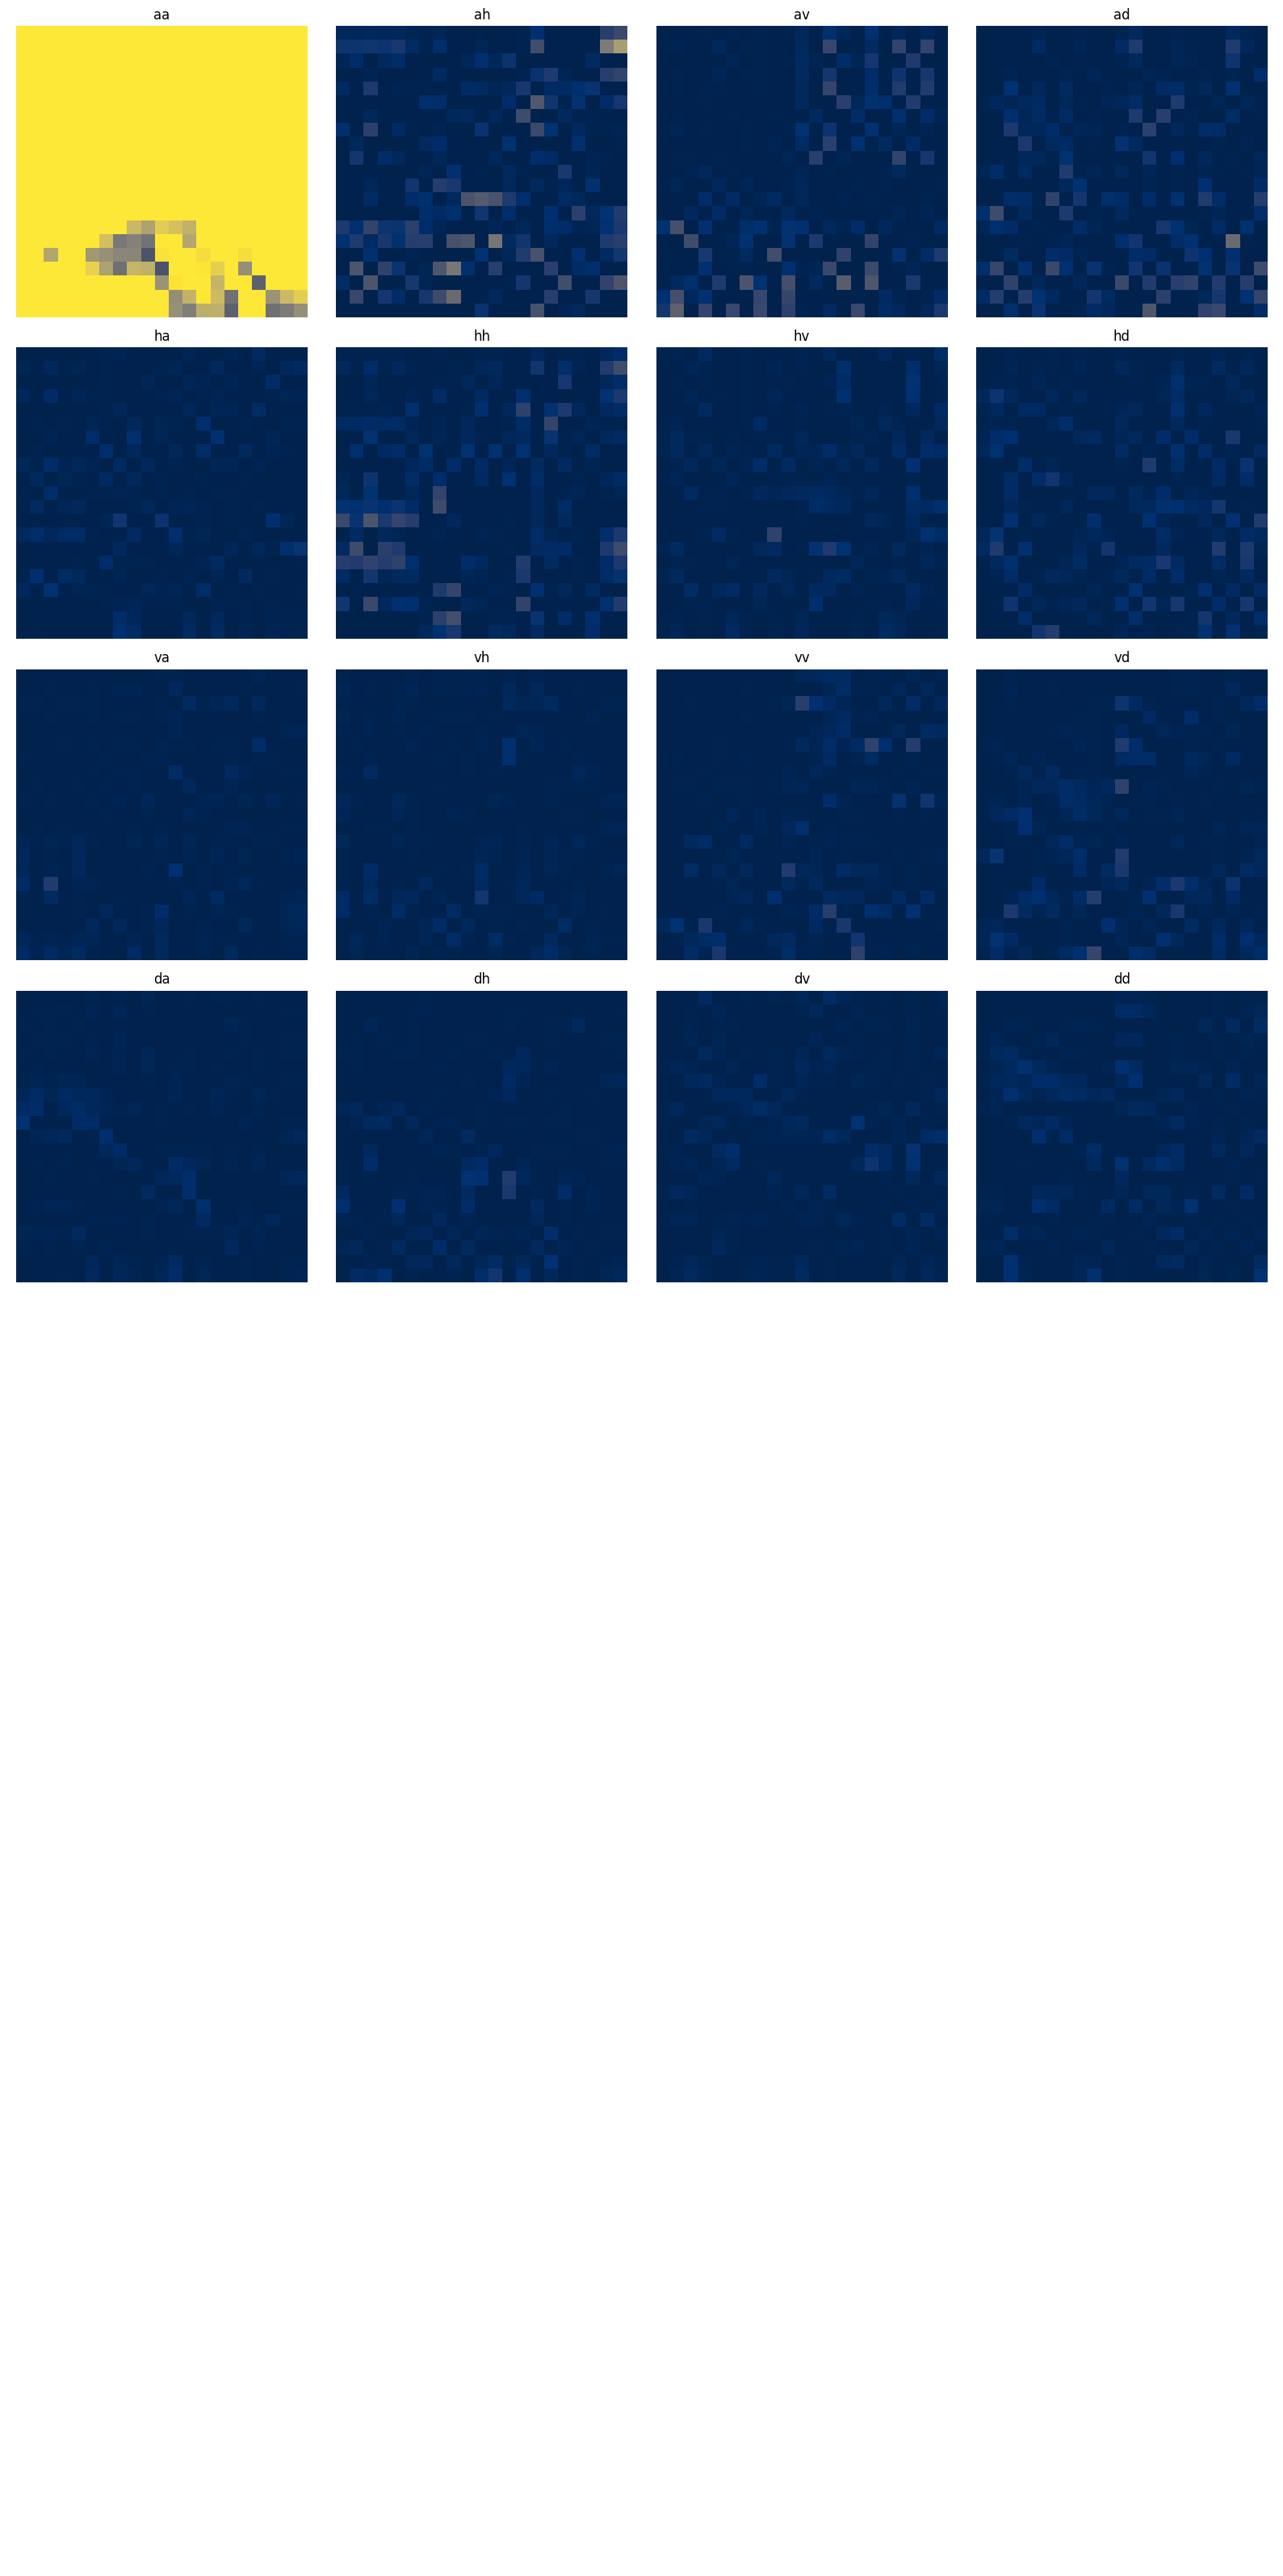

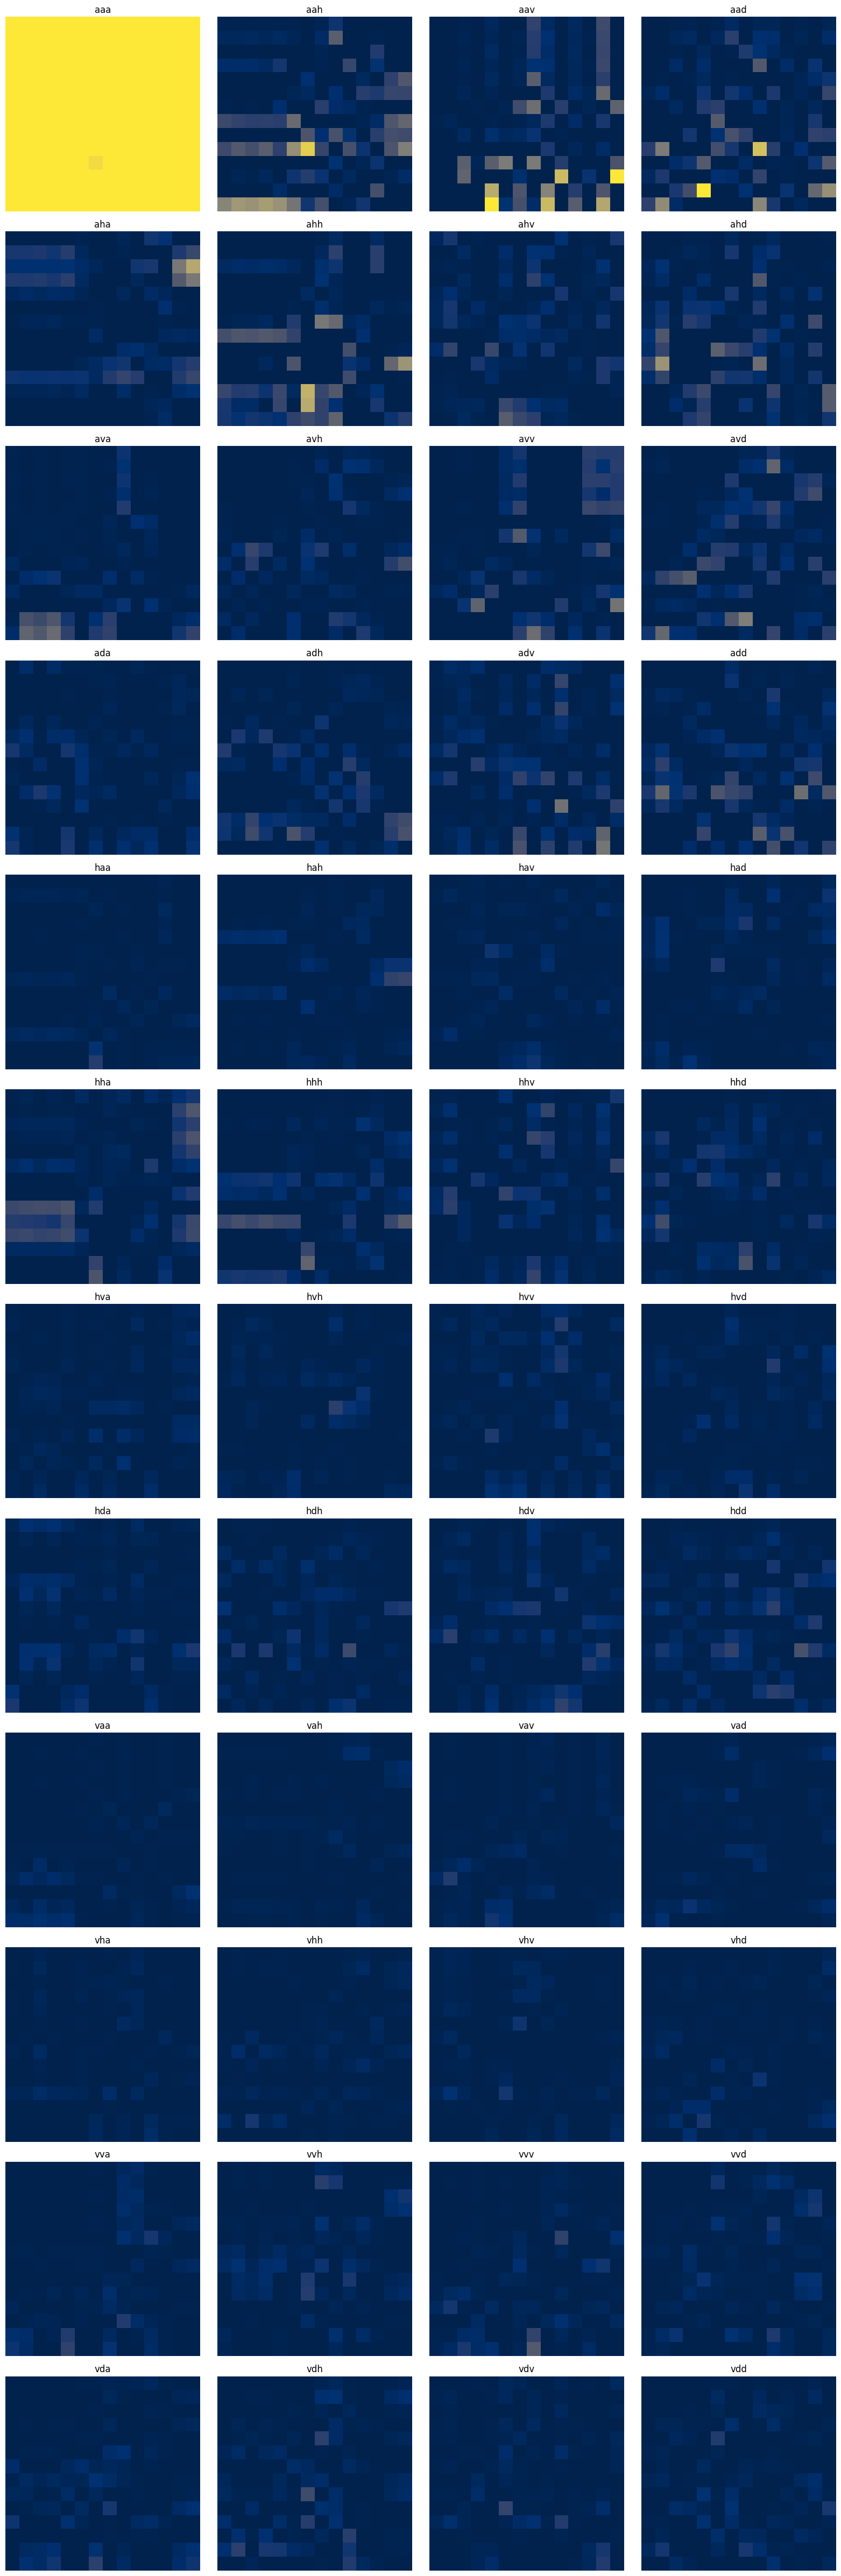

No images provided to display.


In [32]:
for i in range(1,5):
    level_letters = {k:img for k, img in w.data.items() if len(k) == i}
    images = {k: jnp.squeeze(img, 0) for k, img in level_letters.items()}
    display_arrays(cols=4, rows=4*i, **images)